Pertemuan 5

Klasifikasi dengan Naive Bayes

Hans Valerian Lenice

A11.2021.13338

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv("Social_Network_Ads.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[[    35  19000]
 [    49  20000]
 [    39  43000]
 [    41  57000]
 [    58  76000]
 [    47  58000]
 [    55  84000]
 [    52 150000]
 [    40  33000]
 [    46  65000]
 [    48  80000]
 [    52  52000]
 [    59  86000]
 [    35  18000]
 [    47  82000]
 [    60  80000]
 [    49  25000]
 [    40  26000]
 [    46  28000]
 [    59  29000]
 [    41  22000]
 [    35  49000]
 [    37  41000]
 [    60  22000]
 [    35  23000]
 [    37  20000]
 [    36  28000]
 [    56  30000]
 [    40  43000]
 [    42  18000]
 [    35  74000]
 [    39 137000]
 [    40  16000]
 [    49  44000]
 [    38  90000]
 [    46  27000]
 [    40  28000]
 [    37  49000]
 [    46  72000]
 [    53  31000]
 [    42  17000]
 [    38  51000]
 [    50 108000]
 [    56  15000]
 [    41  84000]
 [    51  20000]
 [    35  79000]
 [    57  54000]
 [    41 135000]
 [    35  89000]
 [    44  32000]
 [    37  44000]
 [    48  83000]
 [    37  23000]
 [    50  58000]
 [    52  55000]
 [    41  48000]
 [    40  79000]
 [    58  1800

In [ ]:
print(y)

[0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0
 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
print(x_train)

[[    24  39000]
 [    35 120000]
 [    38  50000]
 [    42 135000]
 [    35  21000]
 [    19 104000]
 [    35  42000]
 [    20  61000]
 [    37  50000]
 [    35  63000]
 [    42  25000]
 [    37  50000]
 [    35  73000]
 [    35  49000]
 [    18  29000]
 [    47  65000]
 [    32 131000]
 [    35  89000]
 [    26  82000]
 [    30  51000]
 [    55  15000]
 [    45 102000]
 [    27 112000]
 [    21 107000]
 [    25  53000]
 [    38  59000]
 [    37  41000]
 [    29 134000]
 [    26 113000]
 [    38 148000]
 [    38  15000]
 [    19  42000]
 [    40  19000]
 [    27 149000]
 [    46  96000]
 [    48  59000]
 [    37  96000]
 [    39  89000]
 [    42  72000]
 [    40  26000]
 [    42  69000]
 [    49  82000]
 [    35  74000]
 [    39  80000]
 [    32  72000]
 [    37 149000]
 [    26  71000]
 [    23 146000]
 [    35  79000]
 [    54  75000]
 [    31  51000]
 [    52  75000]
 [    35  78000]
 [    38  61000]
 [    29 108000]
 [    58  82000]
 [    34  74000]
 [    41  65000]
 [    36  8000

In [ ]:
print(x_test)

[[    42  87000]
 [    38  50000]
 [    18  75000]
 [    51  79000]
 [    25  50000]
 [    35  20000]
 [    60  15000]
 [    25 144000]
 [    35  68000]
 [    18  43000]
 [    37  49000]
 [    57  55000]
 [    49  55000]
 [    29  77000]
 [    59  86000]
 [    45 117000]
 [    29  77000]
 [    53  85000]
 [    27 130000]
 [    49  22000]
 [    46  47000]
 [    22 144000]
 [    48  51000]
 [    34 105000]
 [    46  28000]
 [    37 141000]
 [    52  87000]
 [    60  80000]
 [    24  62000]
 [    37  86000]
 [    60  88000]
 [    33  79000]
 [    28  60000]
 [    47  53000]
 [    42  58000]
 [    38  52000]
 [    39  81000]
 [    59  43000]
 [    58  34000]
 [    35  36000]
 [    58  88000]
 [    40  52000]
 [    55  84000]
 [    49  20000]
 [    28 112000]
 [    50  58000]
 [    34  80000]
 [    24  90000]
 [    40  30000]
 [    28  86000]
 [    27 122000]
 [    47  25000]
 [    29  57000]
 [    60 115000]
 [    30  88000]
 [    40  32000]
 [    48  83000]
 [    48  80000]
 [    36  2800

In [ ]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 1 0 1 0]


In [ ]:
print(y_test)

[0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-1.2885296  -0.88670699]
 [-0.18608011  1.46173768]
 [ 0.11458793 -0.5677824 ]
 [ 0.51547865  1.89663484]
 [-0.18608011 -1.40858358]
 [-1.789643    0.99784738]
 [-0.18608011 -0.79972756]
 [-1.68942032 -0.24885782]
 [ 0.01436525 -0.5677824 ]
 [-0.18608011 -0.19087153]
 [ 0.51547865 -1.29261101]
 [ 0.01436525 -0.5677824 ]
 [-0.18608011  0.09905991]
 [-0.18608011 -0.59677555]
 [-1.88986568 -1.17663843]
 [ 1.01659206 -0.13288524]
 [-0.48674815  1.78066227]
 [-0.18608011  0.56295021]
 [-1.08808423  0.35999821]
 [-0.68719351 -0.53878926]
 [ 1.8183735  -1.58254245]
 [ 0.81614669  0.93986109]
 [-0.98786155  1.22979253]
 [-1.58919764  1.08482681]
 [-1.18830691 -0.48080297]
 [ 0.11458793 -0.30684411]
 [ 0.01436525 -0.8287207 ]
 [-0.78741619  1.8676417 ]
 [-1.08808423  1.25878567]
 [ 0.11458793  2.27354572]
 [ 0.11458793 -1.58254245]
 [-1.789643   -0.79972756]
 [ 0.31503329 -1.46656987]
 [-0.98786155  2.30253886]
 [ 0.91636938  0.76590222]
 [ 1.11681474 -0.30684411]
 [ 0.01436525  0.76590222]
 

In [ ]:
print(x_test)

[[ 0.51547865  0.50496393]
 [ 0.11458793 -0.5677824 ]
 [-1.88986568  0.1570462 ]
 [ 1.41748278  0.27301877]
 [-1.18830691 -0.5677824 ]
 [-0.18608011 -1.43757673]
 [ 2.3194869  -1.58254245]
 [-1.18830691  2.15757314]
 [-0.18608011 -0.04590581]
 [-1.88986568 -0.77073441]
 [ 0.01436525 -0.59677555]
 [ 2.01881886 -0.42281668]
 [ 1.21703742 -0.42281668]
 [-0.78741619  0.21503249]
 [ 2.21926422  0.47597078]
 [ 0.81614669  1.37475825]
 [-0.78741619  0.21503249]
 [ 1.61792814  0.44697764]
 [-0.98786155  1.75166912]
 [ 1.21703742 -1.37959044]
 [ 0.91636938 -0.65476184]
 [-1.48897496  2.15757314]
 [ 1.11681474 -0.53878926]
 [-0.28630279  1.02684052]
 [ 0.91636938 -1.20563157]
 [ 0.01436525  2.07059371]
 [ 1.51770546  0.50496393]
 [ 2.3194869   0.30201192]
 [-1.2885296  -0.21986468]
 [ 0.01436525  0.47597078]
 [ 2.3194869   0.53395707]
 [-0.38652547  0.27301877]
 [-0.88763887 -0.27785096]
 [ 1.01659206 -0.48080297]
 [ 0.51547865 -0.33583725]
 [ 0.11458793 -0.50979612]
 [ 0.21481061  0.33100506]
 

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  9]
 [ 8 32]]


<ipython-input-16-c4eb6906cc1c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],


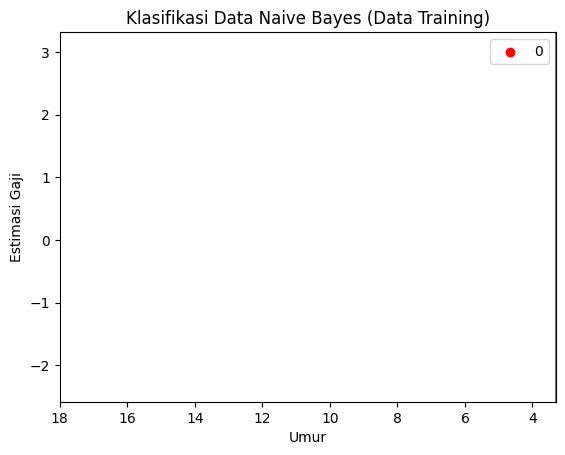

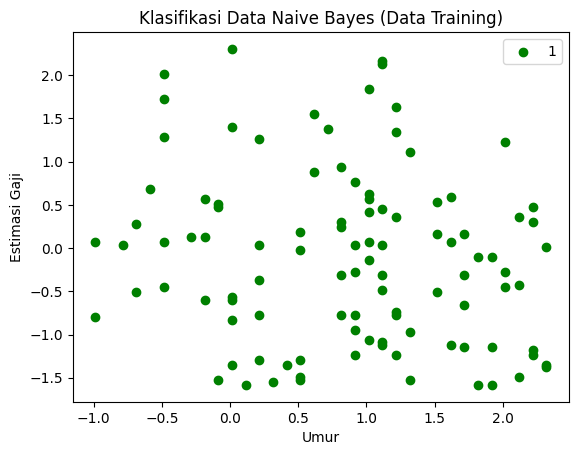

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x.min(),x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
  plt.title('Klasifikasi Data Naive Bayes (Data Training)')
  plt.xlabel('Umur')
  plt.ylabel('Estimasi Gaji')
  plt.legend()
  plt.show()

<ipython-input-20-254b158b0002>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],


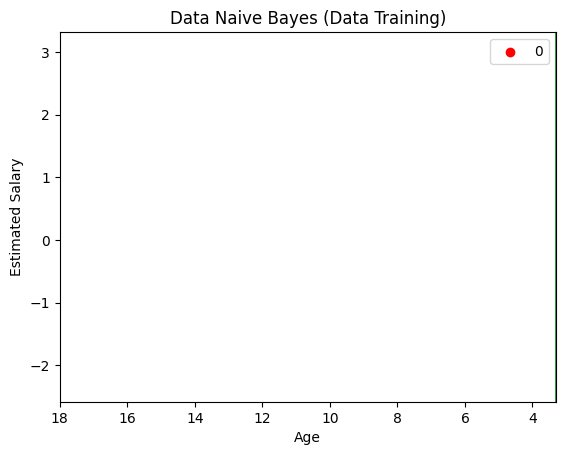

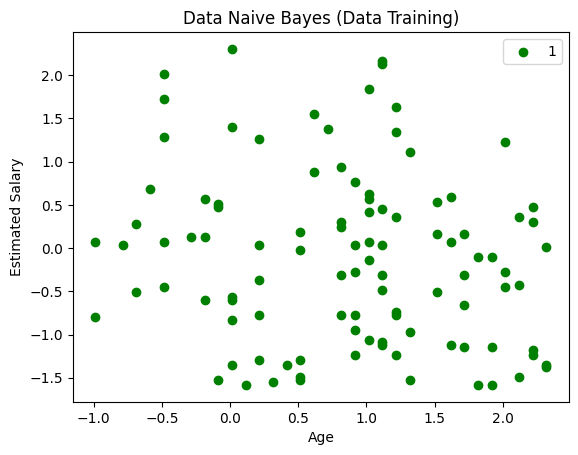

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x.min(),x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
  plt.title('Data Naive Bayes (Data Training)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()